In [1]:
import pandas as pd
import matplotlib as plt
%matplotlib inline
adult = pd.read_csv("./adult.data", sep = ",") #замени потом на урл

In [2]:
adult.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


## How many males and females are there?

In [5]:
adult.groupby("sex").size()

sex
 Female    10771
 Male      21790
dtype: int64

## What is the mean male age?

In [9]:
adult[adult["sex"] == " Male"].age.mean()

39.43354749885268

## What is the proportion of the US citizens?

In [7]:
len(adult[adult["native-country"] == " United-States"]) / len(adult)

0.895857006848684

## Plot the distribution of people’s education as a bar plot.

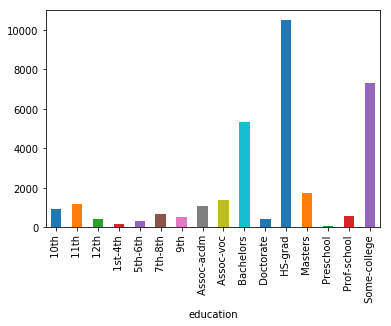

In [44]:
educ = adult.groupby('education').size()
educ.plot.bar()

## What is the mean and standard deviation of the ”final weight” for divorced people?

In [7]:
print("Mean = ", end="")
print(adult[adult["marital-status"] == " Divorced"].fnlwgt.mean())
print("Std = ", end="")
print(adult[adult["marital-status"] == " Divorced"].fnlwgt.std())

Mean = 185802.79045689848
Std = 105646.78945933603


## Is it true that the people who receive over 50k are mostly highly educated?

In [43]:
peop_50 = adult[adult['label'] == ' >50K']
peop_50_high_educ = peop_50[peop_50['education'].isin([' Masters',' Bachelors',' Doctorate'])]
ratio = peop_50_high_educ.size / peop_50.size
True if ratio > 0.5 else False

False

## What is the maximum male and female age for each race?

In [7]:
adult.groupby(["race", "sex"]).age.max()

race                 sex    
 Amer-Indian-Eskimo   Female    80
                      Male      82
 Asian-Pac-Islander   Female    75
                      Male      90
 Black                Female    90
                      Male      90
 Other                Female    74
                      Male      77
 White                Female    90
                      Male      90
Name: age, dtype: int64

## The people from which countries work as farmers/fishers?

In [8]:
adult[adult["occupation"] == " Farming-fishing"].groupby("native-country").size()

native-country
 ?                  5
 Cambodia           1
 Canada             2
 Cuba               2
 El-Salvador        2
 England            1
 France             1
 Germany            1
 Guatemala          4
 Hong               1
 Ireland            1
 Italy              2
 Japan              1
 Mexico            77
 Philippines        4
 Poland             1
 Portugal           1
 Puerto-Rico        5
 United-States    879
 Vietnam            2
 Yugoslavia         1
dtype: int64

## Consider the ratio of the number of 1) male bachelors to male masters, and 2) female
## bachelors to female masters. Which one is higher?

In [11]:
def ratio(sex, educ1, educ2):
    educ1_count = adult[(adult['sex'] == sex) & (adult['education'] == educ1)].size
    educ2_count = adult[(adult['sex'] == sex) & (adult['education'] == educ2)].size
    return educ1_count / educ2_count

print(ratio(" Male", " Bachelors", ' Masters'))
print(ratio(" Female", " Bachelors", ' Masters'))

3.14743049705139
3.0205223880597014


## What is the largest number of hours a person works a week? How many people who work
## this number of hours are there? What is their income?

In [23]:
adult["hours-per-week"].max()

99

In [30]:
len(adult[adult["hours-per-week"] == 99])

85

In [26]:
adult[adult["hours-per-week"] == 99].groupby("capital-gain").size()

capital-gain
0        76
2354      1
2407      1
2907      1
4386      1
4416      1
6418      1
15024     3
dtype: int64